# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

> Лехтерев В.В. Б01-204 <br> **ВАРИАНТ 6**

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analytical_spectrum(F):
    N = 7
    E = 4
    T = 8e-6
    tau = 1e-6

    #NORM = 

    X  = E * (np.sin(np.pi * F * tau) / (np.pi * F)) * (np.sin(np.pi * N * T * F) / np.sin(np.pi * F * T))
    return np.abs(X) 

def analyse(file, const_level=0, window='boxcar'):
    FLIM = (0, 400)

    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[12, 6]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(1000 * np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мкc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    #plt.xlim(0, 16)

    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn), lw=2)
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.xlim((0, 2000))
    #plt.xticks([30], ["30"], minor=True)
    #plt.vlines([30], 0, 1000, "k")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("Аналитический ДВПФ (модуль), линейный масштаб")
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.xlim((0, 2000))
    #plt.xticks([30], ["30"], minor=True)
    #plt.vlines([30], 0, 1000, "k")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.plot(f/1e3, analytical_spectrum(f), lw=2)

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn), lw=2)
    plt.grid()
    plt.xlabel("$f$, кГц")
    #plt.xlim((27, 33))
    #plt.xlim(FLIM)
    #plt.ylim((-60, 5))

    pts = [30, 28, 32, 29, 31, 29.3, 30.7]
    lbl = [str(x) for x in pts]

    #plt.xticks(pts, lbl)
    #plt.vlines(pts, -60, 0, "k")
    #plt.hlines([-3, -6, -31], 26, 34, "k")
    #plt.yticks([0, -3, -6, -31], ["0", "-3", "-6", "-31"])
    #plt.yticks([-60], ["-60"], minor=True)
    #plt.hlines([-60], *FLIM, "k")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

## Пример запуска

In [5]:
#analyse(file='a1.txt', const_level=2, window='boxcar')

# Модуль 1.

## Задание 1.1. Спектр отрезка синусоиды
На генераторе установить синусоидальный сигнал $x(t)=A\sin (2\pi {{f}_{0}}t+\varphi )$ с частотой ${{f}_{0}}$, соответствующей номеру варианта, и амплитудой $A=2$ (в управляющей программе устанавливается удвоенная амплитуда). 


|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$f_0, кГц$ |120|80|60|50|40|30|20|90|110|200|150|140|

Установить в управляющей программе осциллографа
* число выборок $N=1000$ ("Настройки" -> "Выборки" -> 1000 и "Нормально"), 
* размерность ДПФ  ${{N}_{\text{FFT}}}=8192$ ("Настройки" -> "БПФ" -> Размер -> 8192), 
* режим закрытого входа осциллографа (кнопка ~ над блоком "Синхронизация").

Выбрать временной диапазон так, чтобы частота дискретизации была равна ${{f}_{\text{д}}}=1\ \text{МГц}$ (диапазон 0.1 mS).  Построить оценку спектра с помощью прямоугольного окна и окна Ханна. Сохранить осциллограмму сигнала в файл.

Произвести обработку данных на Python. Рекомендуемая размерность ДПФ для обработки в Python ${{N}_{\text{FFT}}}={{2}^{18}}$. Для анализа отсчетов синусоиды вычесть постоянный уровень $A=2$. Построить графики спектра дискретизованного сигнала (ДВПФ) для случая прямоугольного окна (```window='boxcar'```) и окна Ханна (```window='hann'```). 

Сравнить
* а) частоты максимумов в спектре с частотой синусоиды,
* б) ширину главного лепестка спектра на нулевом уровне с табличным значением для окна, 
* в) ширину главного лепестка спектра на уровнях $-3\ \text{дБ}$ и $-6\ \text{дБ}$ от максимального в бинах ДПФ с табличным значением для окна,
* г) уровень максимального бокового лепестка спектра относительно главного с табличным значением для окна,
* д) относительный уровень шумов квантования в дБ с теоретическим значением для 8-разрядного АЦП.


In [95]:
import pandas as pd
dict1 = {}
dict1["прямоугольное окно"]= {"частота максимума в спектре": "30 kHz",
                             "ширина главного лепестка на нулевом уровне":"2 kHz",
                             "ширина главного лепестка на уровне -3дБ":"0.9 kHz",
                             "ширина главного лепестка на уровне -6дБ":"1.2 kHz",
                             "уровень максимального бокового лепестка":"-13 dB",
                             "относительный уровень шумов квантования":"-60 dB",
                             }

dict1["окно Ханна"]= {"частота максимума в спектре":"30 kHz",
                             "ширина главного лепестка на нулевом уровне":"4 kHz",
                             "ширина главного лепестка на уровне -3дБ":"1.4 kHz",
                             "ширина главного лепестка на уровне -6дБ":"2 kHz",
                             "уровень максимального бокового лепестка":"-31 dB",
                             "относительный уровень шумов квантования":"-60 dB",
                             }
df = pd.DataFrame(dict1)
df

,прямоугольное окно,окно Ханна
частота максимума в спектре,30 kHz,30 kHz
ширина главного лепестка на нулевом уровне,2 kHz,4 kHz
ширина главного лепестка на уровне -3дБ,0.9 kHz,1.4 kHz
ширина главного лепестка на уровне -6дБ,1.2 kHz,2 kHz
уровень максимального бокового лепестка,-13 dB,-31 dB
относительный уровень шумов квантования,-60 dB,-60 dB


In [97]:
# здесь и далее выполнить подстановку своего имени файла .txt
#analyse(file='Data/1-1-signal.txt', const_level=0, window='hann')

### Измерения: Прямоугольное окно

![](Assets/1-1-boxcar-1.png)
![](Assets/1-1-boxcar-2.png)


### Измерения: Окно Ханна

![](Assets/1-1-hann-1.png)
![](Assets/1-1-hann-2.png)

## Задание 1.2. Эффект наложения при дискретизации синусоиды.
Установить на генераторе частоту синусоидального сигнала ${{f}_{1}}$ (сигнал $x(t)=A\sin (2\pi {{f}_{1}}t+\varphi )$). Для того же значения частоты дискретизации, что и в задаче 1.1, получить оценку спектра. Определить, совпадает ли положение главного максимума в спектре. Обосновать результат.

|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$f_1, кГц$ |700|650|750|850|800|625|675|825|725|775|625|700|

### Прямоугольное окно

![](Assets/1-2-boxcar.bmp)

### Окно Ханна
![](Assets/1-2-hann.bmp)

В обоих случаях частота пика составила $f=375kHz$, что соотвествует $f=f_s - f_1=1000kHz - 625kHz = 375kHz$

## Задание 1.3. Спектр последовательности прямоугольных импульсов. 
На генераторе установить сигнал в виде последовательности импульсов с длительностью $\tau $ и периодом следования $T$ (раздел «Импульсы»). Установить в управляющей программе осциллографа число выборок $N=1000$, размерность ДПФ  ${{N}_{\text{FFT}}}=8192$. Выбрать временной диапазон так, чтобы частота дискретизации была равна ${{f}_{\text{д}}}=20\ \text{МГц}$, а на осциллограмме наблюдалось несколько импульсов (примерный диапазон 5 uS). Рекомендуется использовать режим открытого входа осциллографа. 


|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$\tau $, мкс |1,5|	2|	2,5|	3|	3,5|	1|	1,5|	2|	1|	1,5|	3|	2|
|$T$, мкс|10|10|10|10|10|8|8|8|8|9|9|9|

Произвести обработку данных на Python. Рекомендуемая размерность ДПФ для обработки в Python ${{N}_{\text{FFT}}}={{2}^{18}}$. Построить графики спектра дискретизованного сигнала (ДВПФ) для случая прямоугольного окна. Сравнить АЧХ сигнала в линейном масштабе с теоретическим результатом. 

** Получить график АЧХ в линейном масштабе для инвертированной последовательности (с длительностью $T-\tau $). Сравнить результаты. 


C:\Users\Vladimir\AppData\Local\Temp\ipykernel_19304\230956602.py:13: RuntimeWarning: invalid value encountered in divide
  X  = E * (np.sin(np.pi * F * tau) / (np.pi * F)) * (np.sin(np.pi * N * T * F) / np.sin(np.pi * F * T))


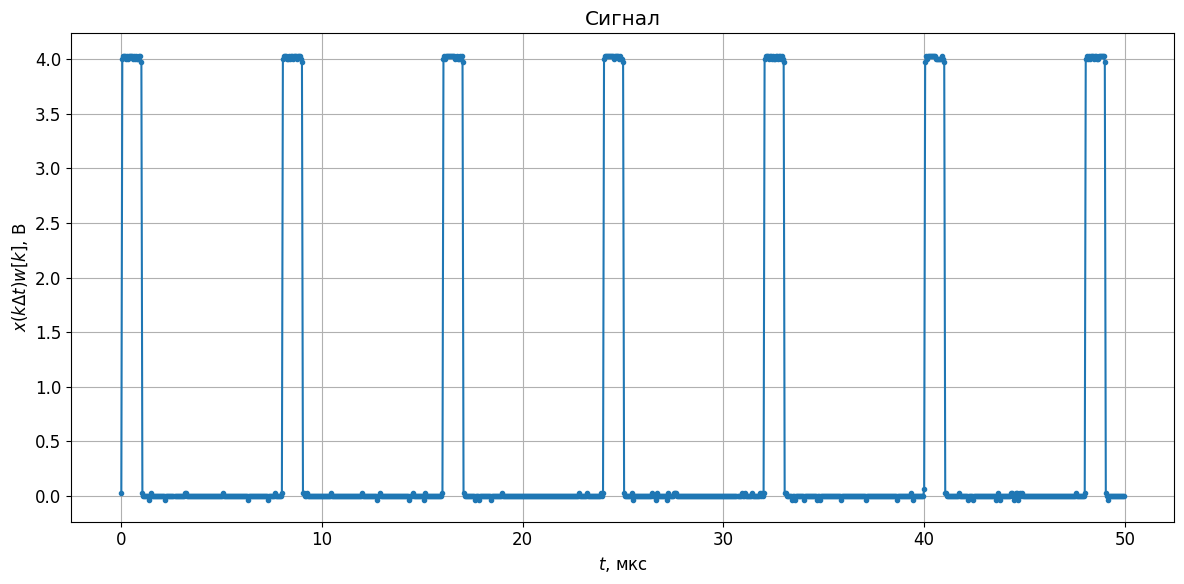

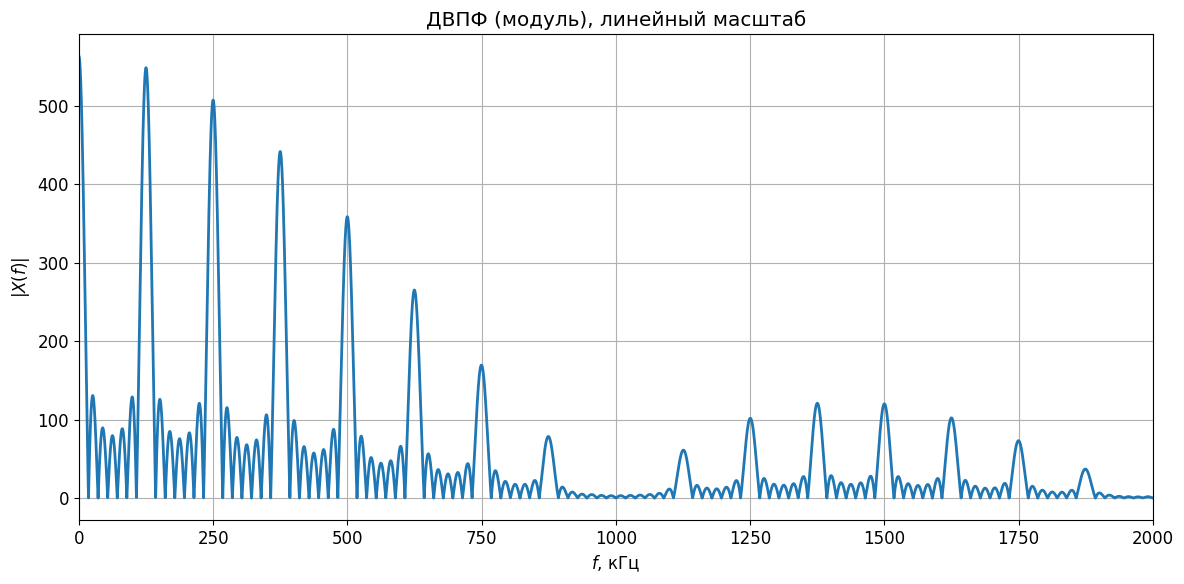

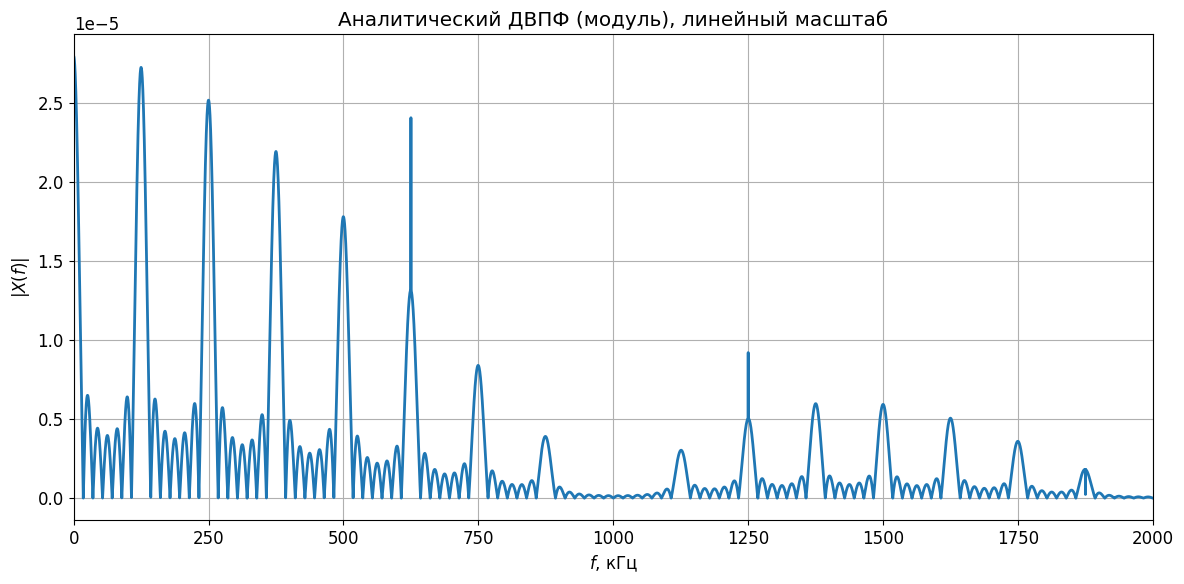

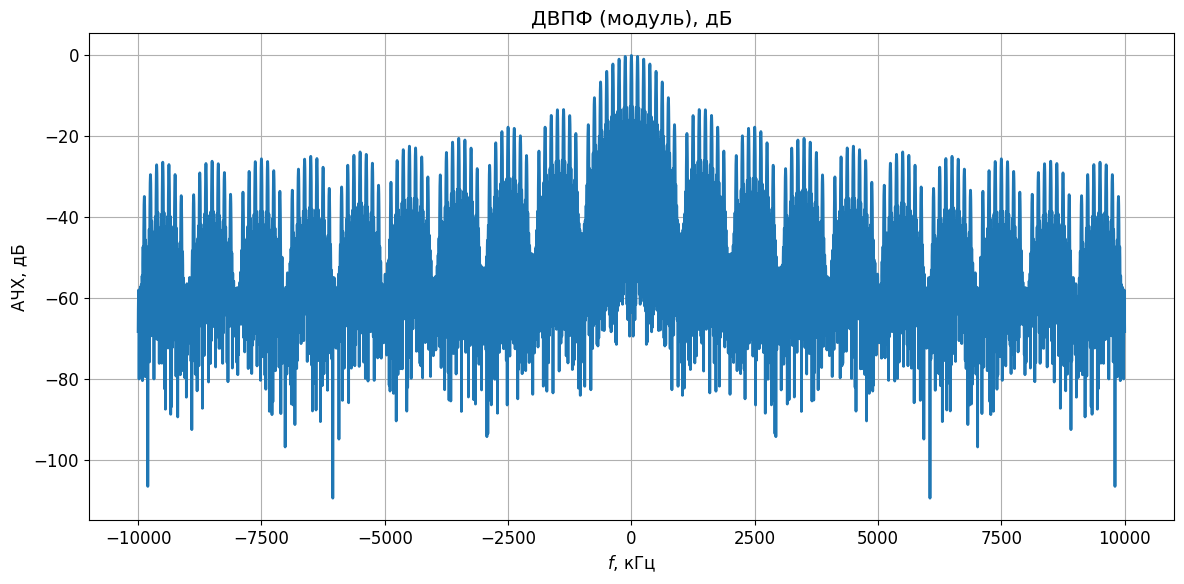

In [212]:
analyse(file='Data/1-3-signal.txt', const_level=0, window='boxcar')

> На графике аналитического ДВПФ есть выбросы в точках с неопределенностями. Мне лень это фиксить. <br>Графики реального и аналитического ДВПФ совпадают с точностью до нормировки.

# Модуль 2.

## Задание 2.1. Субдискретизация полосовых радиосигналов
Найти минимальную частоту дискретизации ${{f}_{\text{}}}{{}_{\text{min}}}$ для канала 4 на рисунке. Изобразить спектр сигнала до дискретизации (точка А). Найти и изобразить спектр дискретного сигнала (точка Б).
 

1) С помощью встроенного в цифровой осциллограф генератора сигналов (в режиме синусоидального сигнала со свипированием частоты - ГКЧ) реализовать полосовой сигнал для каналов 0, 4, 5. Найти минимальную частоту дискретизации ${{f}_{\text{д}}}{{}_{\text{min}}}$ для этих каналов. С использованием окна Ханна получить оценку спектра дискретного сигнала для каждого из этих каналов в полосе Найквиста.
2)  Повторить п. 1-2 для частоты дискретизации ${{f}_{\text{д}}}=2{{f}_{\text{}}}{{}_{\text{min}}}.$ Объяснить результат.

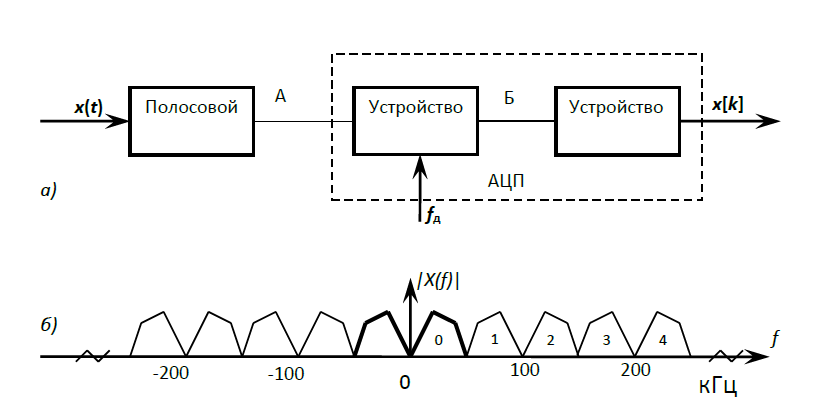

Имеем случай целочисленных полос с $2f_в=50 кГц$, поэтому для любого канала минимальная частота дискретизации будет $f_{smin} = 4f_в = 100кГц$.

In [214]:
def analyse_module2(file, const_level=2, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  
    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("АЧХ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.xlim([0, fs/2/1e3])
    plt.ylim(bottom=-50)
    plt.tight_layout()
    
#     plt.show()

### Пункт 1. $f_д = 4f_в$

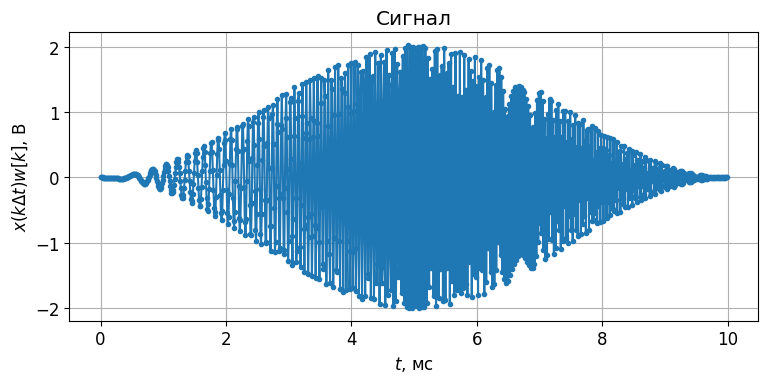

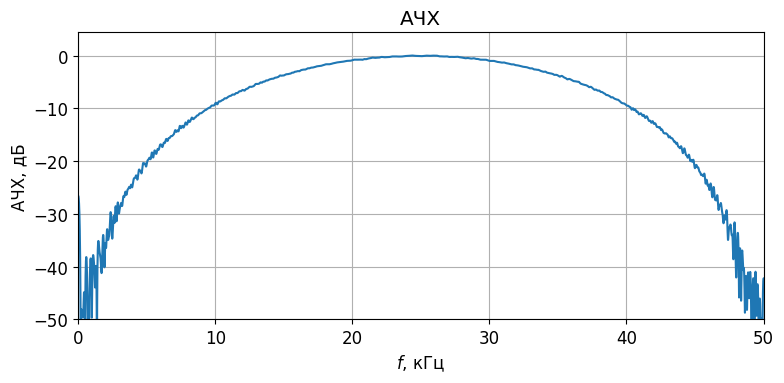

In [215]:
analyse_module2(file="Data/2-1-ch0-1.txt", window="hann")

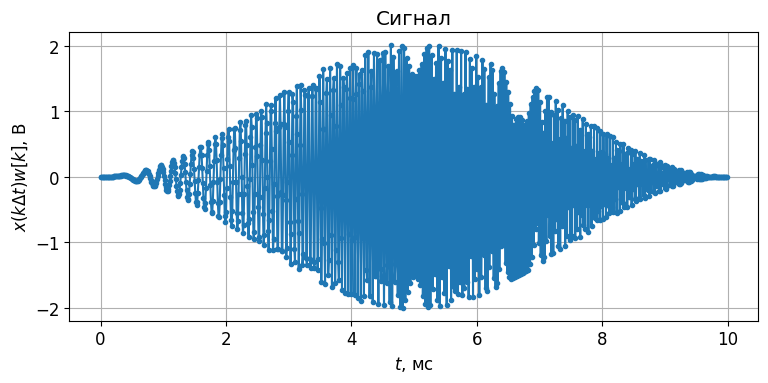

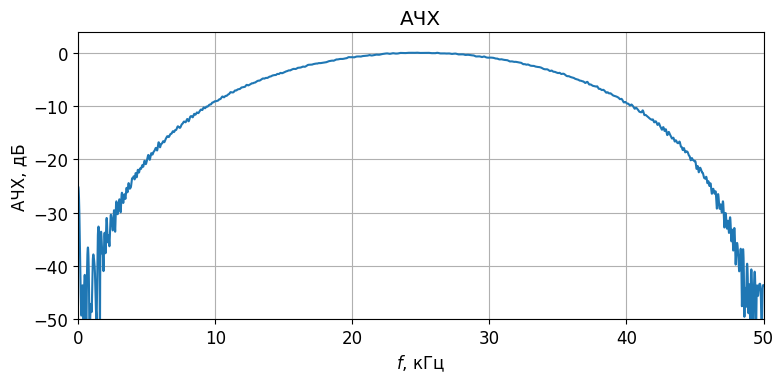

In [216]:
analyse_module2(file="Data/2-1-ch4-1.txt", window="hann")

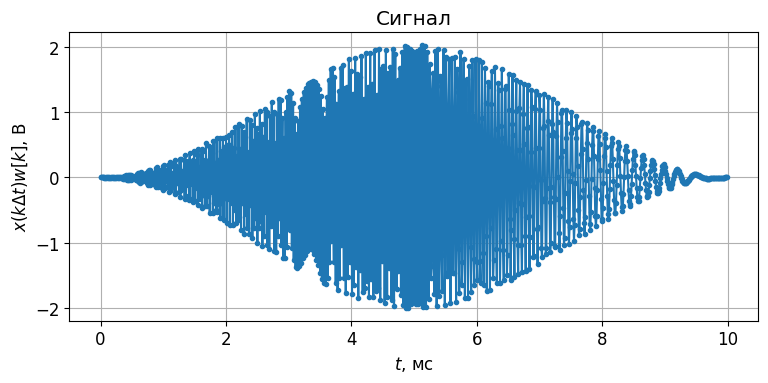

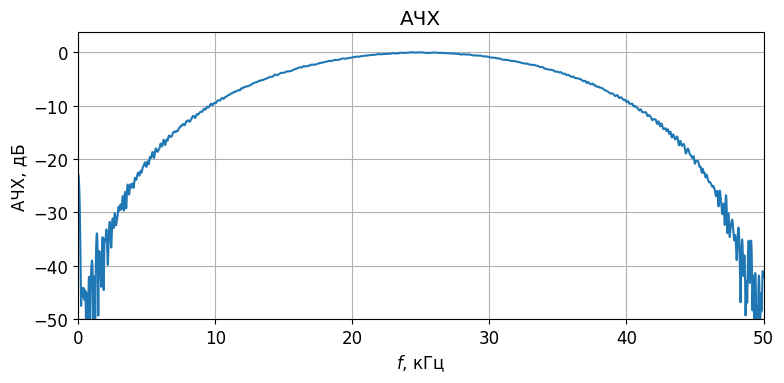

In [217]:
analyse_module2(file="Data/2-1-ch5-1.txt", window="hann")

> Картинки плюс-минус совпадают, что логично.

### Пункт2. $f_d = 2f_{smin} = 8f_в$

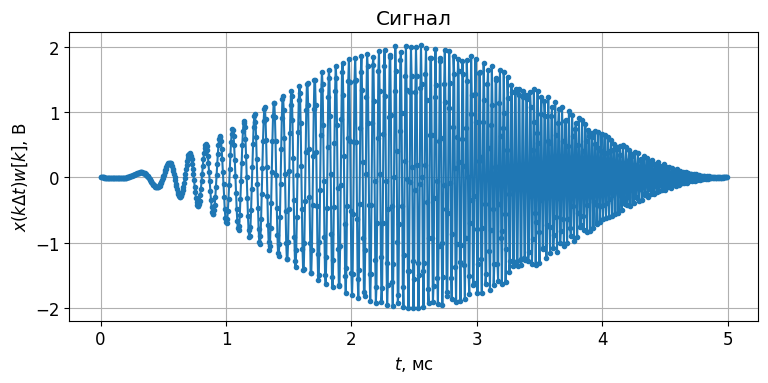

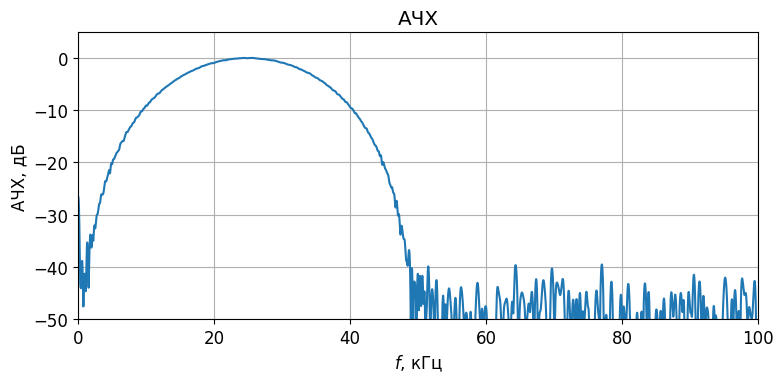

In [218]:
analyse_module2(file="Data/2-1-ch0-2.txt", window="hann")

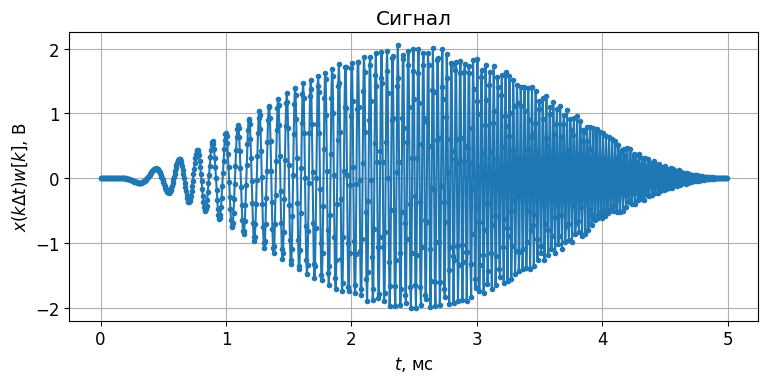

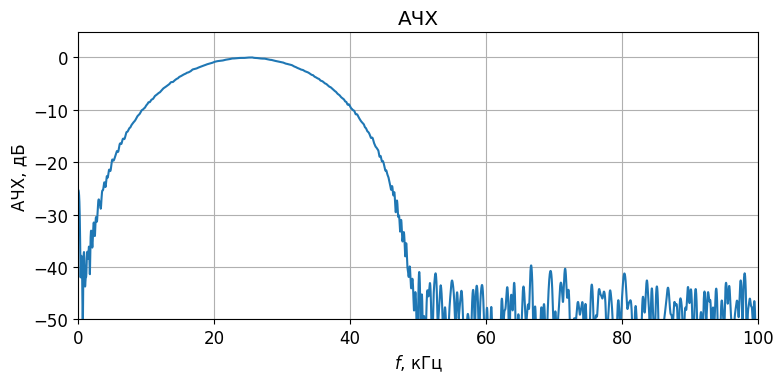

In [219]:
analyse_module2(file="Data/2-1-ch4-2.txt", window="hann")

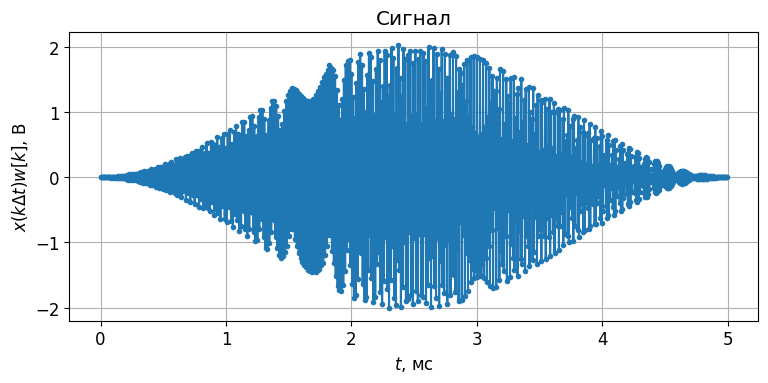

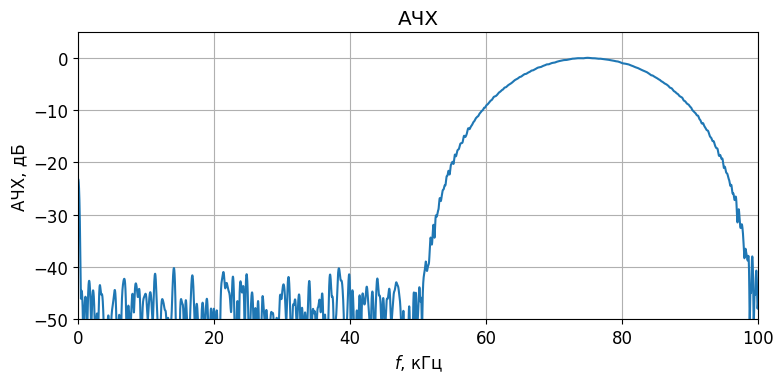

In [220]:
analyse_module2(file="Data/2-1-ch5-2.txt", window="hann")

Для четных каналов все осталось по прежнему (за исключением расширения полосы Найквиста). Для нечетного 5-го канала все немного уехало:

![](Assets/graph.png)